In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 读取数据并预览

In [64]:
path = 'Engineering_graduate_salary.csv'
data = pd.read_csv(path)
data.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [66]:
data.info

<bound method DataFrame.info of           ID Gender         DOB  10percentage                       10board  \
0     604399      f  1990-10-22         87.80                          cbse   
1     988334      m  1990-05-15         57.00                          cbse   
2     301647      m  1989-08-21         77.33  maharashtra state board,pune   
3     582313      m  1991-05-04         84.30                          cbse   
4     339001      f  1990-10-30         82.00                          cbse   
...      ...    ...         ...           ...                           ...   
2993  103174      f  1989-04-17         75.00                             0   
2994  352811      f  1991-07-22         84.00                   state board   
2995  287070      m  1988-11-24         91.40                         bsemp   
2996  317336      m  1988-08-25         88.64     karnataka education board   
2997  993701      m  1992-05-27         77.00                   state board   

      12graduation 

In [68]:
rows,columns = data.shape
rows,columns

(2998, 34)

In [70]:
if rows<100 and columns<20:
    print("数据全部内容信息")
    print(data.to_csv(sep='\t', na_rep='nan'))
    # sep='\t' 指定分隔符为制表符
    # na_rep指定缺失值（NaN）在文件中的表示方式为字符串 'nan'
else:
    print('数据前几行内容信息：')
    print(data.head().to_csv(sep='\t', na_rep='nan'))

数据前几行内容信息：
	ID	Gender	DOB	10percentage	10board	12graduation	12percentage	12board	CollegeID	CollegeTier	Degree	Specialization	collegeGPA	CollegeCityID	CollegeCityTier	CollegeState	GraduationYear	English	Logical	Quant	Domain	ComputerProgramming	ElectronicsAndSemicon	ComputerScience	MechanicalEngg	ElectricalEngg	TelecomEngg	CivilEngg	conscientiousness	agreeableness	extraversion	nueroticism	openess_to_experience	Salary
0	604399	f	1990-10-22	87.8	cbse	2009	84.0	cbse	6920	1	B.Tech/B.E.	instrumentation and control engineering	73.82	6920	1	Delhi	2013	650	665	810	0.694479327708463	485	366	-1	-1	-1	-1	-1	-0.159	0.3789	1.2396	0.1459	0.2889	445000
1	988334	m	1990-05-15	57.0	cbse	2010	64.5	cbse	6624	2	B.Tech/B.E.	computer science & engineering	65.0	6624	0	Uttar Pradesh	2014	440	435	210	0.342314899911815	365	-1	-1	-1	-1	-1	-1	1.1336	0.0459	1.2396	0.5262	-0.2859	110000
2	301647	m	1989-08-21	77.33	maharashtra state board,pune	2007	85.17	amravati divisional board	9084	2	B.Tech/B.E.	electronics & teleco

# 数据清洗

## 是否有重复行

In [74]:
print("重复行数:", data.duplicated().sum())
# df.duplicated() 是 pandas 中用于检测 DataFrame 中重复行的方法，它返回一个布尔类型的 Series
data = data.drop_duplicates()

重复行数: 0


## 检测并处理异常值

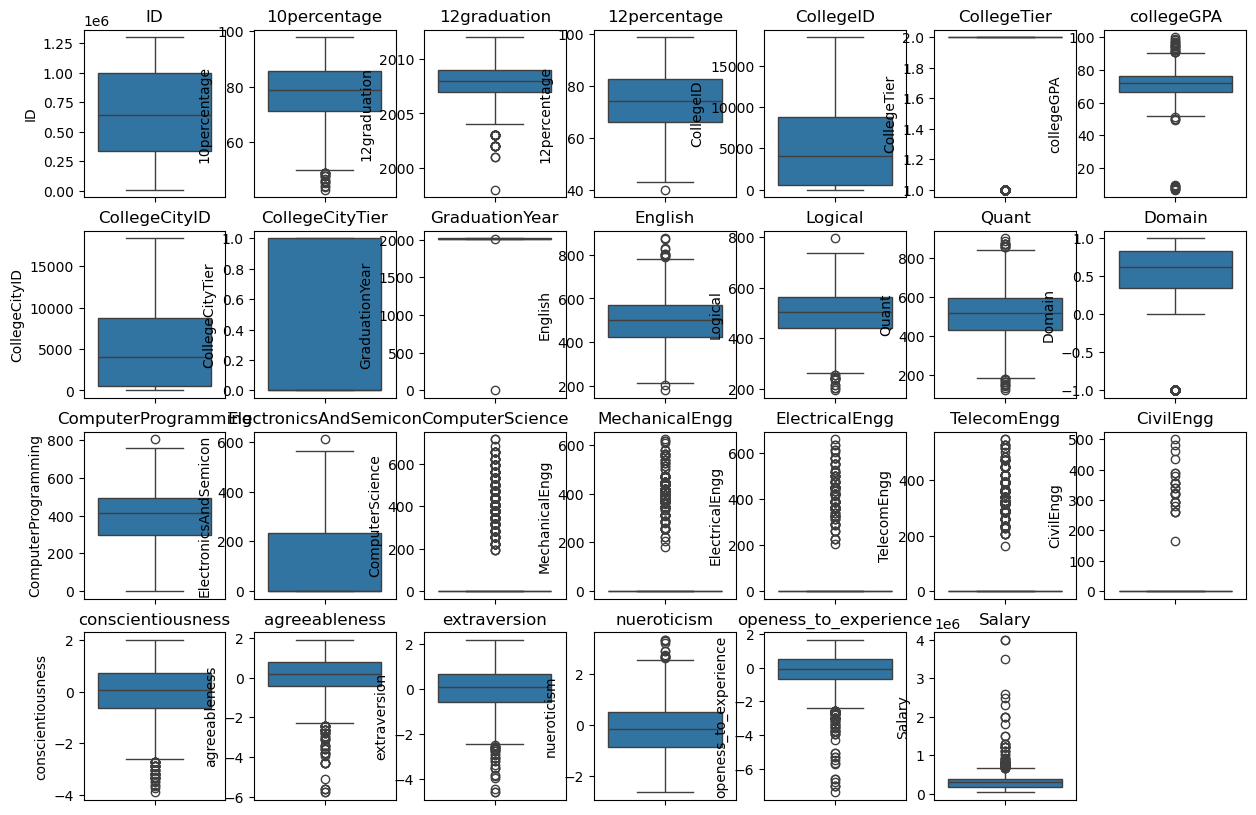

In [77]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 7, i+1)
    sns.boxplot(data=data[col])
    plt.title(col)
plt.show()

In [78]:
def handle_outliners(data, column):
    q1 = data[column].quantile(0.25)
    # data[column].quantile(0.25) 是 pandas 中用于计算指定列数据的下四分位数（Q1） 的方法
    q3 = data[column].quantile(0.75)
    iqr = q3-q1
    lowerbound = q1 - 1.5*iqr
    higherbound = q3 + 1.5*iqr

    outliners = data[(data[column] < lowerbound) | (data[column] > higherbound)][column].copy()
    data[column] = data[column].clip(lower=lowerbound, upper=higherbound)
    return data, outliners
outliners_list = {}
for col in numeric_cols:
    data, outliners = handle_outliners(data, col)
    outliners_list[col] = outliners
for col, outliners in outliners_list.items():
    print(f"{col}列的异常值数量为{len(outliners)}") 

ID列的异常值数量为0
10percentage列的异常值数量为17
12graduation列的异常值数量为29
12percentage列的异常值数量为1
CollegeID列的异常值数量为0
CollegeTier列的异常值数量为226
collegeGPA列的异常值数量为32
CollegeCityID列的异常值数量为0
CollegeCityTier列的异常值数量为0
GraduationYear列的异常值数量为2
English列的异常值数量为12
Logical列的异常值数量为15
Quant列的异常值数量为22
Domain列的异常值数量为179
ComputerProgramming列的异常值数量为1
ElectronicsAndSemicon列的异常值数量为1
ComputerScience列的异常值数量为700
MechanicalEngg列的异常值数量为187
ElectricalEngg列的异常值数量为122
TelecomEngg列的异常值数量为274
CivilEngg列的异常值数量为26
conscientiousness列的异常值数量为41
agreeableness列的异常值数量为49
extraversion列的异常值数量为30
nueroticism列的异常值数量为12
openess_to_experience列的异常值数量为69
Salary列的异常值数量为78


## 对日期列进行处理

In [81]:
data['DOB'] = pd.to_datetime(data['DOB'])
data['DOB_year'] = data['DOB'].dt.year
data['DOB_month'] = data['DOB'].dt.month
data['DOB_day'] = data['DOB'].dt.day
# dt是用于处理Series中的datatime类型数据的特殊的访问器

print("数据基本信息")
data.info()

rows, columns = data.shape
if rows < 100 and columns < 20:
    print("数据全部信息")
    print(data.to_csv(sep='\t', na_rep="nan"))
else:
    print("数据前几行信息")
    print(data.head().to_csv(sep='\t', na_rep="nan"))

数据基本信息
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     2998 non-null   int64         
 1   Gender                 2998 non-null   object        
 2   DOB                    2998 non-null   datetime64[ns]
 3   10percentage           2998 non-null   float64       
 4   10board                2998 non-null   object        
 5   12graduation           2998 non-null   int64         
 6   12percentage           2998 non-null   float64       
 7   12board                2998 non-null   object        
 8   CollegeID              2998 non-null   int64         
 9   CollegeTier            2998 non-null   int64         
 10  Degree                 2998 non-null   object        
 11  Specialization         2998 non-null   object        
 12  collegeGPA             2998 non-null   float64       
 

## 对数据集中的类别型变量进行编码

In [2]:
categorical_cols = data.select_dtypes(include=['object']).columns
# 'object'类型默认指str类型
# 对低基数类别型变量（类别数少于5）进行独热编码
low_cardinality_cols = [col for col in categorical_cols if data[col].nunique() < 5]
data = pd.get_dummies(data, columns=low_cardinality_cols, drop_first=True)
# pd.get_dummies() 是 pandas 库中用于实现独热编码（One-hot encoding） 的便捷函数，
# 专门用于将分类变量（非数值型数据）转换为机器学习模型可处理的数值形式。

# 更新 categorical_cols，去除已经进行独热编码的列
categorical_cols = [col for col in categorical_cols if col not in low_cardinality_cols]

# 对高基数类别型变量进行标签编码
high_cardinality_cols = [col for col in categorical_cols if data[col].nunique() >= 5]
for col in high_cardinality_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

print("数据基本信息")
data.info()

rows, columns = data.shape
if rows < 100 and columns < 20:
    print("打印全部数据")
    print(data.to_csv(sep='\t', na_rep='nan'))
else:
    print("打印部分数据")
    print(data.head().to_csv(sep='\t', na_rep='nan'))

NameError: name 'data' is not defined

## 标准化

In [90]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.drop('ID')

scaler = StandardScaler()

data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

print("数据基本信息")
data.info()

rows, columns = data.shape
if rows < 100 and columns < 30:
    print("全部信息")
    print(data.to_csv(sep='\t', na_rep='nan'))
else:
    print("部分信息")
    print(data.head().to_csv(sep='\t', na_rep='nan'))

数据基本信息
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     2998 non-null   int64         
 1   DOB                    2998 non-null   datetime64[ns]
 2   10percentage           2998 non-null   float64       
 3   10board                2998 non-null   int32         
 4   12graduation           2998 non-null   float64       
 5   12percentage           2998 non-null   float64       
 6   12board                2998 non-null   int32         
 7   CollegeID              2998 non-null   float64       
 8   CollegeTier            2998 non-null   float64       
 9   Specialization         2998 non-null   int32         
 10  collegeGPA             2998 non-null   float64       
 11  CollegeCityID          2998 non-null   float64       
 12  CollegeCityTier        2998 non-null   float64       
 

# 训练模型

In [93]:
X = data.drop(['ID', 'Salary', 'ComputerScience', 'DOB'],axis=1)
y = data['Salary']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

print(f'均方误差: {mse}')
print(f'均方根误差: {rmse}')
print(f'决定系数: {r2}')

均方误差: 0.6563830497243854
均方根误差: 0.8101747032118353
决定系数: 0.3197164896325235


In [ ]:
# 模型的更迭